In [395]:
## Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [397]:
## Loading the dataset
df=pd.read_csv(r"C:\Users\MAMUN RASHID\Downloads\test_data.csv")
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
913,bc226c0b448c3e6c418f9fc476b4c189,2016-01-01 13:15:34 +0000,http://www.flipkart.com/ada-jewel-alloy-set/p/...,Ada Jewel Alloy Jewel Set,JWSEAAFF47ZV9MUN,1099.0,899.0,"[""http://img6a.flixcart.com/image/jewellery-se...",False,Ada Jewel Alloy Jewel Set - Buy Ada Jewel Allo...,No rating available,No rating available,Ada Jewel,"{""product_specification""=>[{""key""=>""Base Mater..."
2449,d24d49cf91280c4fddac62c5a92b9a20,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Stickers Sticker,STIE9F5UGQZCJVJG,779.0,623.0,"[""http://img5a.flixcart.com/image/sticker/h/v/...",False,Buy Wallmantra Medium Vinyl Stickers Sticker f...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1561,4e8b0b5e290fea141db4845b69a4399b,2016-04-24 11:14:19 +0000,http://www.flipkart.com/foot-candy-girls-sanda...,Foot Candy Girls Sandals,SNDEHJ6ETMCK2FQQ,1499.0,899.0,"[""http://img6a.flixcart.com/image/sandal/6/w/n...",False,Key Features of Foot Candy Girls Sandals Occas...,No rating available,No rating available,Foot Candy,"{""product_specification""=>[{""key""=>""Occasion"",..."
344,122a0dbd86e8a6bdcb7ecbb731646b21,2015-12-20 08:26:17 +0000,http://www.flipkart.com/anjan-brass-cubic-zirc...,Anjan Brass Cubic Zirconia Yellow Gold Kada,BBAE8WCSJYCFVSMZ,1439.0,649.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Anjan Brass Cubic Zirconia Yellow Gold Kada\n ...,No rating available,No rating available,Anjan,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
244,56e1382aadc5e685a9f1a57ec349fd3d,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-back-cove...,TheLostPuppy Back Cover for Apple iPad Air,ACCE9Y6VYBSXWGF3,2199.0,599.0,"[""http://img6a.flixcart.com/image/cases-covers...",False,TheLostPuppy Back Cover for Apple iPad Air (Mu...,No rating available,No rating available,TheLostPuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


## Exploring Key Features

In [400]:
# Checking the info of dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  2534 non-null   object 
 1   crawl_timestamp          2534 non-null   object 
 2   product_url              2534 non-null   object 
 3   product_name             2534 non-null   object 
 4   pid                      2534 non-null   object 
 5   retail_price             2530 non-null   float64
 6   discounted_price         2530 non-null   float64
 7   image                    2534 non-null   object 
 8   is_FK_Advantage_product  2534 non-null   bool   
 9   description              2534 non-null   object 
 10  product_rating           2534 non-null   object 
 11  overall_rating           2534 non-null   object 
 12  brand                    2012 non-null   object 
 13  product_specifications   2529 non-null   object 
dtypes: bool(1), float64(2), 

(2534, 14)

In [402]:
# Checking the total number of duplicated value
df.duplicated().sum()

0

In [404]:
# Finding the missing values
df.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
pid                          0
retail_price                 4
discounted_price             4
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      522
product_specifications       5
dtype: int64

In [406]:
# Summary of numeric columns
df.describe()

,retail_price,discounted_price
count,2530.000000,2530.000000
mean,1894.598024,1011.826877
std,2872.584966,1722.890000
min,55.000000,47.000000
25%,850.000000,449.000000
50%,1299.000000,600.000000
75%,2199.000000,950.000000
max,46500.000000,25510.000000


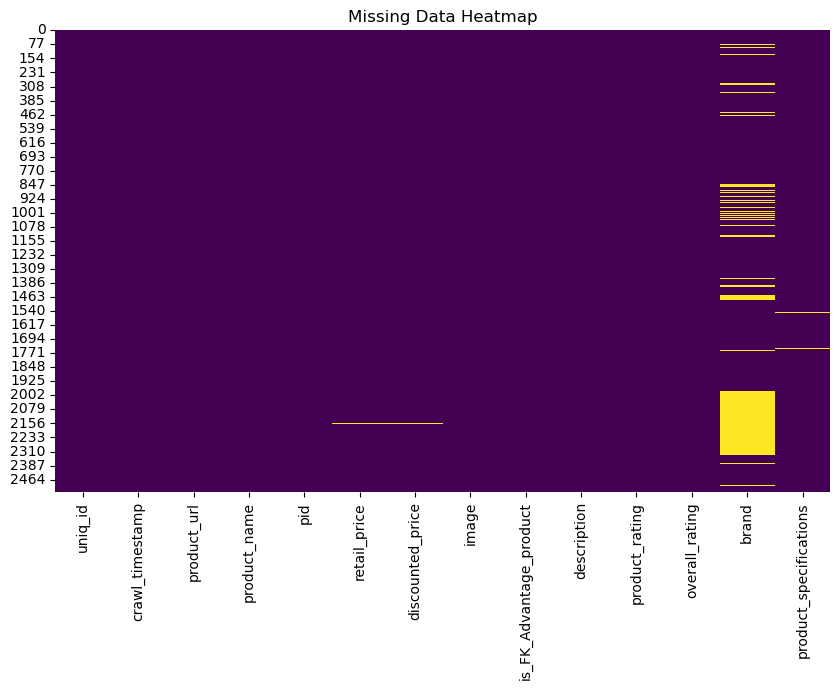

In [408]:
# visualizing the missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

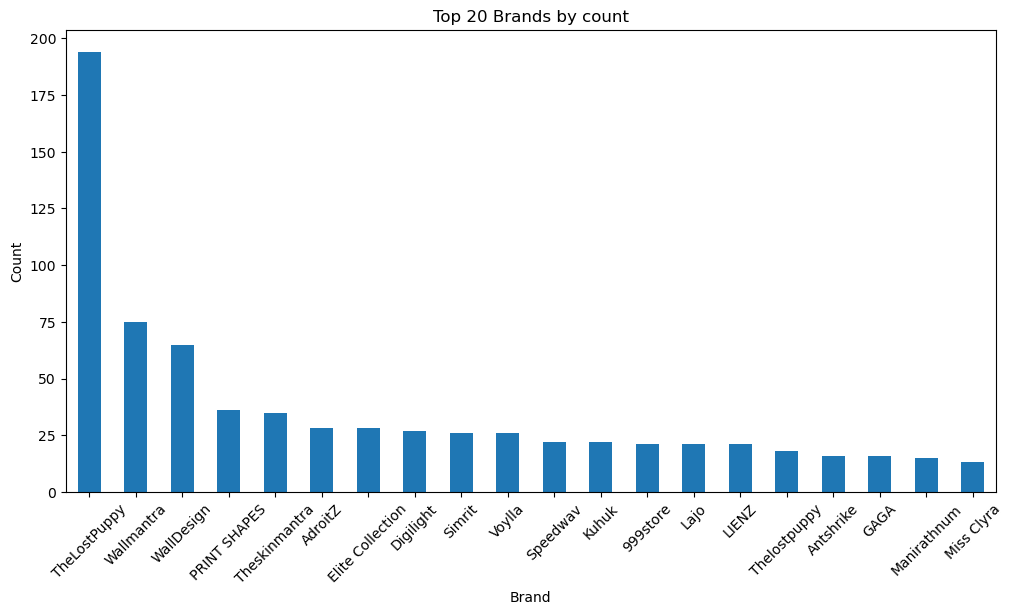

In [410]:
# Disribution of brands
brand_counts = df['brand'].value_counts()

plt.figure(figsize=(12, 6))
brand_counts[:20].plot(kind='bar')
plt.title("Top 20 Brands by count")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

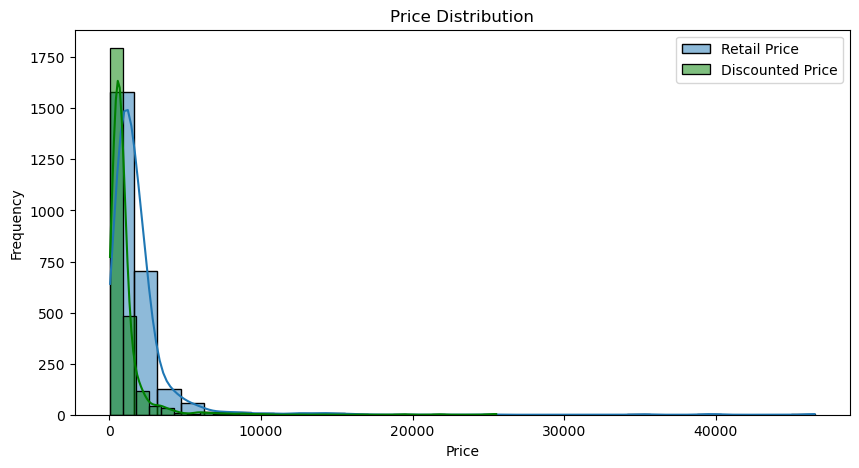

In [412]:
# Price analysis by histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['retail_price'], kde=True, bins=30, label='Retail Price')
sns.histplot(df['discounted_price'], kde=True, bins=30, label='Discounted Price', color='green')
plt.legend()
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

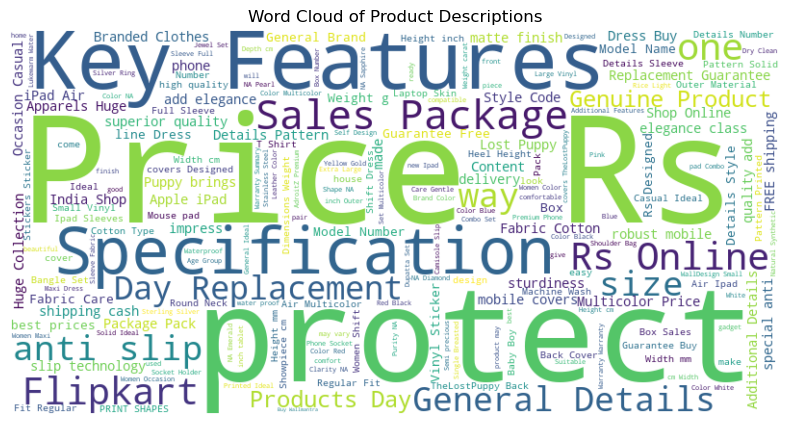

In [414]:
# Text data analysis by wordcloud
from wordcloud import WordCloud
text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Product Descriptions")
plt.show()

## Preprocessing

In [417]:
# handling missing values of the dataset
df['brand'].fillna("Unknown", inplace=True)
df['description'].fillna("", inplace=True)
df['retail_price'].fillna(df['retail_price'].median(), inplace=True)
df['discounted_price'].fillna(df['discounted_price'].median(), inplace=True)
df['product_specifications'].fillna('{}', inplace=True)
df.dropna(thresh=len(df.columns) - 2, inplace=True)

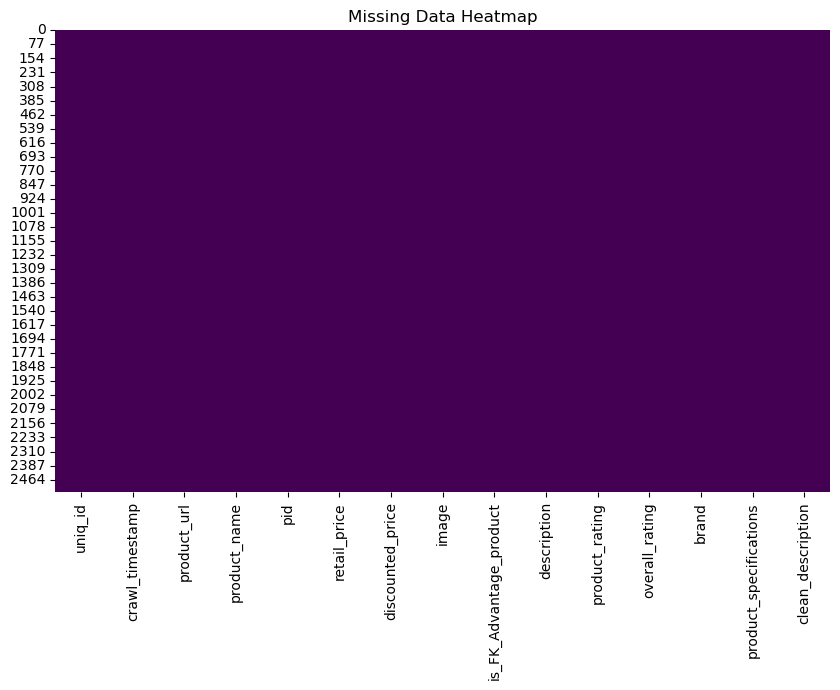

In [393]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

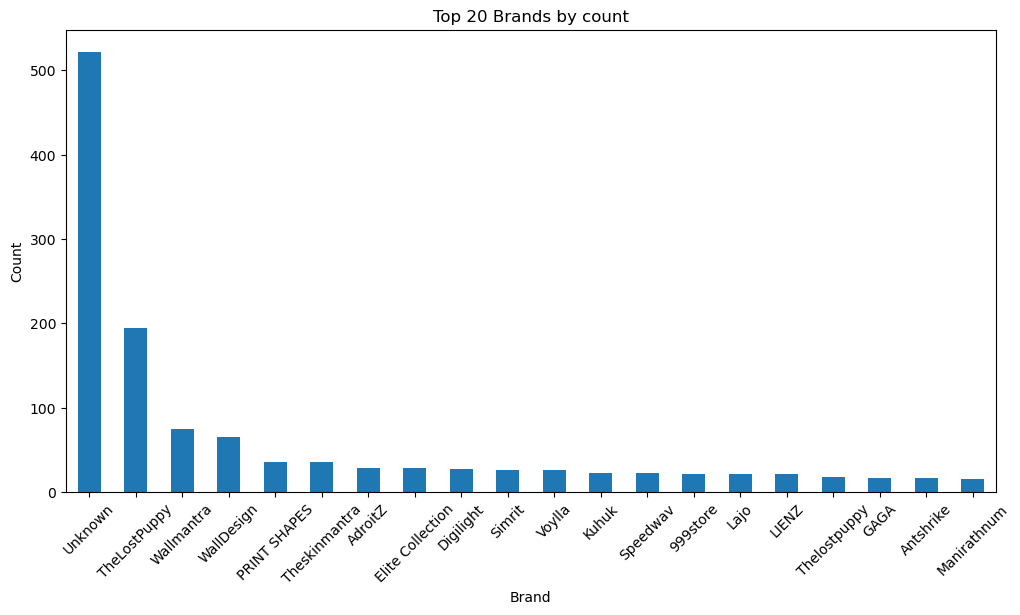

In [419]:
brand_counts = df['brand'].value_counts()

plt.figure(figsize=(12, 6))
brand_counts[:20].plot(kind='bar')
plt.title("Top 20 Brands by count")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

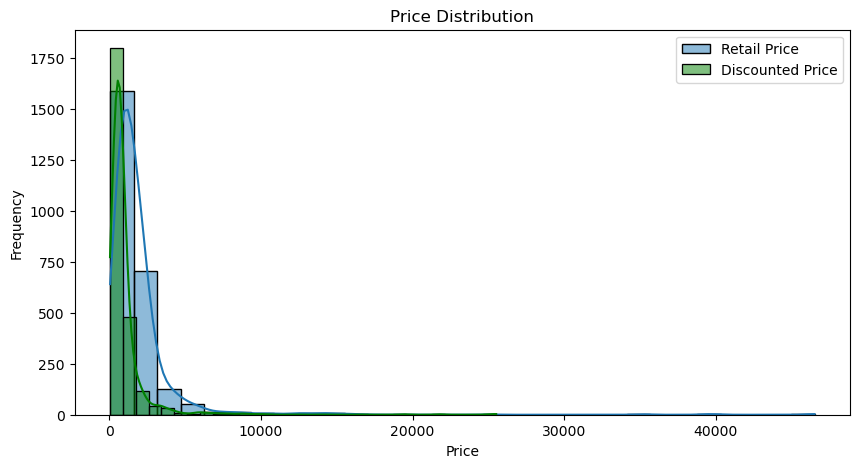

In [421]:
plt.figure(figsize=(10, 5))
sns.histplot(df['retail_price'], kde=True, bins=30, label='Retail Price')
sns.histplot(df['discounted_price'], kde=True, bins=30, label='Discounted Price', color='green')
plt.legend()
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

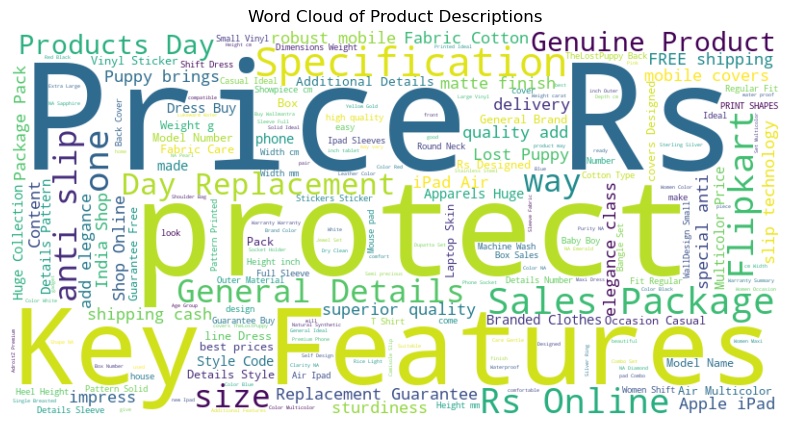

In [423]:
from wordcloud import WordCloud
text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Product Descriptions")
plt.show()

In [168]:
# Text cleaning 
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)
df['clean_description'] = df['description'].apply(clean_text)

## Feature Engineering

In [173]:
# heature scaling using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
tfidf_features = tfidf.fit_transform(df['clean_description']).toarray()
tfidf_df = pd.DataFrame(tfidf_features, columns=tfidf.get_feature_names_out())

## Class Imbalance

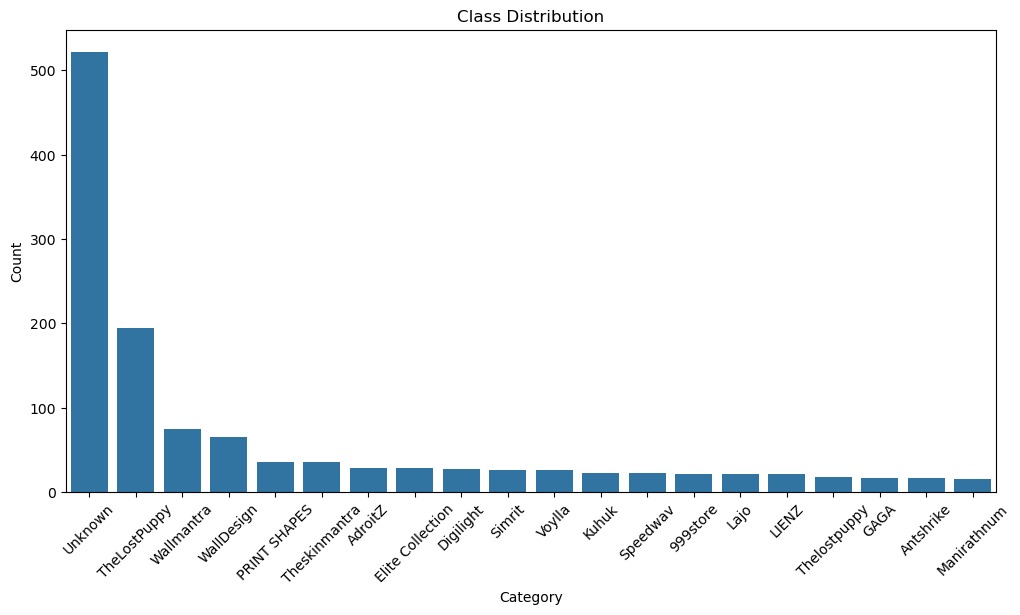

In [176]:
# Class Balance Distribution
category_counts = df['brand'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index[:20], y=category_counts.values[:20])
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

In [178]:
# Resampling 
from imblearn.over_sampling import SMOTE

class_counts = df['brand'].value_counts()
valid_classes = class_counts[class_counts >= 6].index
sampling_strategy = {cls: int(class_counts[cls] * 1.5) for cls in valid_classes}  

smote = SMOTE(sampling_strategy=sampling_strategy)
X_resampled, y_resampled = smote.fit_resample(tfidf_df, df['brand'])

## Multi-Class Text Classifier

## RandomForestClassifier

In [345]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"--- Evaluation Metrics for {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Recall (Weighted): {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score (Weighted): {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [349]:
# Training the Machine
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [351]:
# Prediction
rf_pred = rf_model.predict(X_test)

In [353]:
# Evaluation
evaluate_model(y_test, rf_pred, model_name="Random Forest")

--- Evaluation Metrics for Random Forest ---
Accuracy: 0.7061
Recall (Weighted): 0.7061
F1 Score (Weighted): 0.6767

Classification Report:
                         precision    recall  f1-score   support

           69th Avenue       0.50      1.00      0.67         1
            925 Silver       1.00      1.00      1.00         1
              999store       1.00      1.00      1.00         2
            99HomeMart       1.00      1.00      1.00         1
                 @home       1.00      1.00      1.00         1
           ACCESSOREEZ       1.00      1.00      1.00         1
            AJ Dezines       0.00      0.00      0.00         1
           AM Creation       0.00      0.00      0.00         1
         ANAND ARCHIES       1.00      1.00      1.00         1
               APOLLO+       0.00      0.00      0.00         1
          ARK Creation       0.00      0.00      0.00         0
               Aakrati       0.00      0.00      0.00         1
          Aamore Decor    

## Logistic Regression

In [356]:
from sklearn.linear_model import LogisticRegression

# Training
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [358]:
# Predict
lr_pred = lr_model.predict(X_test)

In [360]:
# Evaluation
evaluate_model(y_test, lr_pred, model_name="Logistic Regression")

--- Evaluation Metrics for Logistic Regression ---
Accuracy: 0.5365
Recall (Weighted): 0.5365
F1 Score (Weighted): 0.4131

Classification Report:
                         precision    recall  f1-score   support

           69th Avenue       0.00      0.00      0.00         1
            925 Silver       0.00      0.00      0.00         1
              999store       1.00      1.00      1.00         2
            99HomeMart       0.00      0.00      0.00         1
                 @home       0.00      0.00      0.00         1
           ACCESSOREEZ       0.00      0.00      0.00         1
            AJ Dezines       0.00      0.00      0.00         1
           AM Creation       0.00      0.00      0.00         1
         ANAND ARCHIES       0.00      0.00      0.00         1
               APOLLO+       0.00      0.00      0.00         1
               Aakrati       0.00      0.00      0.00         1
          Aamore Decor       0.00      0.00      0.00         1
                Aarn

## SVM(Support Vector Machine)

In [363]:
from sklearn.svm import SVC

# Training SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [365]:
# Predict
svm_pred = svm_model.predict(X_test)

In [366]:
# Evaluation
evaluate_model(y_test, svm_pred, model_name="Support Vector Machine")

--- Evaluation Metrics for Support Vector Machine ---
Accuracy: 0.6213
Recall (Weighted): 0.6213
F1 Score (Weighted): 0.5403

Classification Report:
                         precision    recall  f1-score   support

           69th Avenue       0.00      0.00      0.00         1
            925 Silver       0.00      0.00      0.00         1
              999store       1.00      1.00      1.00         2
            99HomeMart       0.00      0.00      0.00         1
                 @home       0.00      0.00      0.00         1
           ACCESSOREEZ       1.00      1.00      1.00         1
            AJ Dezines       1.00      1.00      1.00         1
           ALL DAY 365       0.00      0.00      0.00         0
           AM Creation       0.00      0.00      0.00         1
         ANAND ARCHIES       0.00      0.00      0.00         1
               APOLLO+       0.00      0.00      0.00         1
               Aakrati       0.00      0.00      0.00         1
          Aamore 

In [369]:
# Storing metrics 
model_results = {
    "Model": ["Logistic Regression", "Random Forest", "Support Vector Machine"],
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, svm_pred),
    ],
    "Recall": [
        recall_score(y_test, lr_pred, average='weighted'),
        recall_score(y_test, rf_pred, average='weighted'),
        recall_score(y_test, svm_pred, average='weighted'),
    ],
    "F1 Score": [
        f1_score(y_test, lr_pred, average='weighted'),
        f1_score(y_test, rf_pred, average='weighted'),
        f1_score(y_test, svm_pred, average='weighted'),
    ],
}

## Cross Validation

In [371]:
# Display the DataFrame
print(results_df)

                    Model  Accuracy    Recall  F1 Score
0     Logistic Regression  0.536489  0.536489  0.413134
1           Random Forest  0.706114  0.706114  0.676710
2  Support Vector Machine  0.621302  0.621302  0.540336


In [373]:
# Saving results to a CSV file
results_df.to_csv('model_performance_comparison.csv', index=False)
print("Results saved to 'model_performance_comparison.csv'")

Results saved to 'model_performance_comparison.csv'


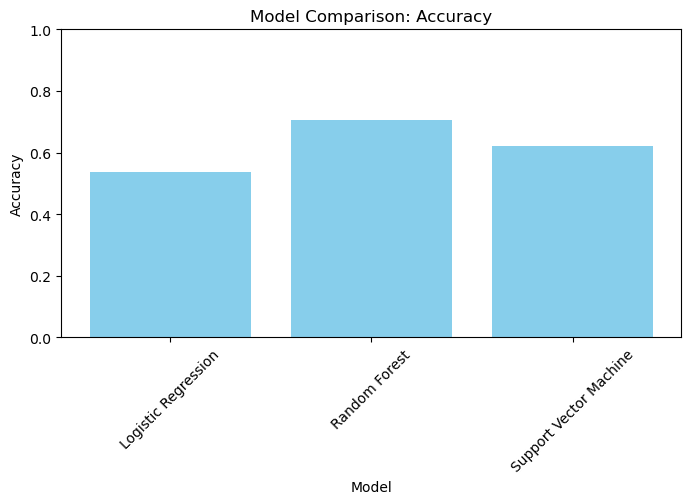

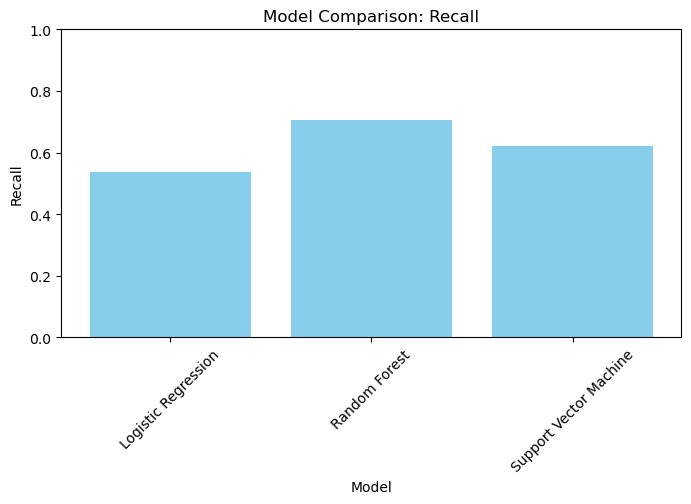

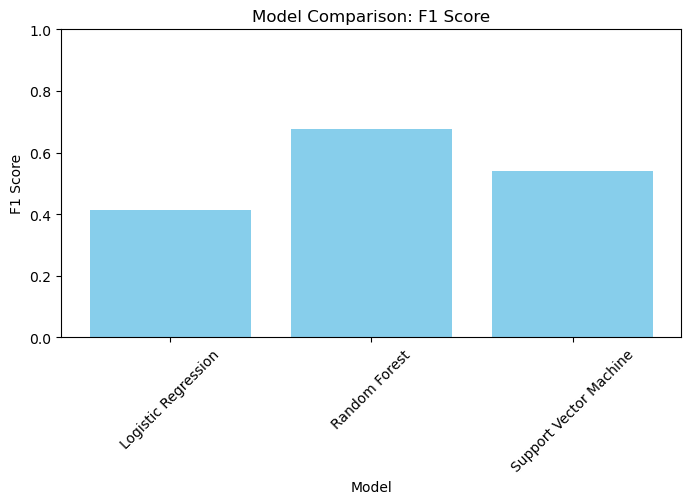

In [375]:
# Visulizing the result
metrics = ["Accuracy", "Recall", "F1 Score"]
for metric in metrics:
    plt.figure(figsize=(8, 4))
    plt.bar(results_df["Model"], results_df[metric], color='skyblue')
    plt.title(f"Model Comparison: {metric}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()